<a href="https://colab.research.google.com/github/jaskiratkalra26/Sentiment-Analysis/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pickle
with open('review_embeddings.pkl','rb') as f:
  data = pickle.load(f)



In [3]:
data.keys()


dict_keys(['embeddings', 'labels'])

In [4]:
word_embeddings = data['embeddings']
labels = data['labels']
word_embeddings[0].shape
from collections import Counter
Counter(labels)


Counter({'positive': 25000, 'negative': 25000})

In [5]:
labels = list(map(lambda x:1 if x=='positive' else 0,labels))

In [6]:
labels[:10]

[1, 1, 1, 0, 1, 1, 1, 0, 0, 1]

In [8]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(word_embeddings,labels,test_size=0.2)
x_train = tf.squeeze(x_train)
x_test = tf.squeeze(x_test)

In [9]:
x_train = tf.convert_to_tensor(x_train)
x_test = tf.convert_to_tensor(x_test)
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)

In [10]:
import tensorflow as tf
from tensorflow import keras

In [11]:
model = keras.Sequential([
    keras.layers.Dense(768,input_shape=(768,),activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(1,activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=60)

Epoch 1/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.6820 - loss: 0.5931
Epoch 2/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.7494 - loss: 0.5047
Epoch 3/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.7657 - loss: 0.4791
Epoch 4/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.7731 - loss: 0.4647
Epoch 5/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7849 - loss: 0.4491
Epoch 6/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7938 - loss: 0.4367
Epoch 7/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8016 - loss: 0.4232
Epoch 8/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8089 - loss: 0.4068
Epoch 9/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8186 - loss: 0.3921
Epoch 10/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.8301 - loss: 0.3772
Epoch 11/60
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.8339 - loss: 0.3629
Epoch 12/60
1250

In [13]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7751 - loss: 0.9858


[0.9675205945968628, 0.7757999897003174]

In [14]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred = model.predict(x_test)
y_pred = tf.squeeze(y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [15]:
y_pred = tf.cast(y_pred >= 0.5, tf.int32)


In [16]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.78      0.76      0.77      4953\n           1       0.77      0.79      0.78      5047\n\n    accuracy                           0.78     10000\n   macro avg       0.78      0.78      0.78     10000\nweighted avg       0.78      0.78      0.78     10000\n'

In [17]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[3784, 1169],
       [1073, 3974]])

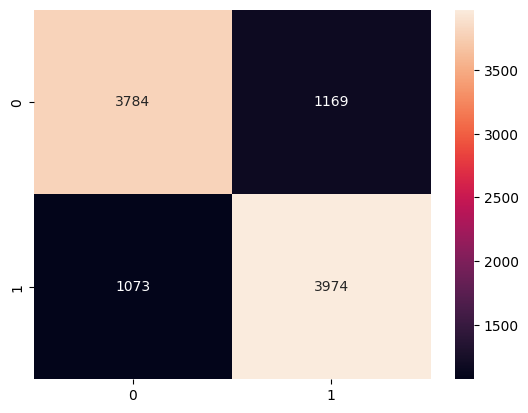

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')
plt.show()